# Implementation of Mean Shift Clustering
#### 25th June, 2018
#### Ratan Kumar Singh

Mean shift clustering algorithm is another supervised learning algorithm used for clustering of datapoints. This algorithm considers a small neighbourhood for the computation of mean unlike Kmeans clustering. Another aspect from which Mean shift Clustering differs from Kmeans clustering is the fact that it does not require number of the clusters to be given initially.
It automatically computes the number of clusters and corresponding centroids.
Once centroids are computed, we can easily compute the clusters.The algorithm works on following steps:

##### For Each datapoint (Reference datapoint) in the dataset do following steps

- **compute a neighbourhood and corresponding distance, with respect to reference datapoint.**
- **Assign a weight to all the data points, depending upon the kernel (Gaussian in this case) and distance from reference datapoint**
- **Multiply each data point with corresponding weight and take sum of it**
- **Divide the weighted sum of datapoints by net sum of weights. Replace reference datapoint by point so obtained**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def eucleadeanDistance(X,Y):
    X = np.array(X)
    Y = np.array(Y)
    dist = np.sqrt(np.sum((X-Y)**2))
    return dist

def gaussianKernel(dist,spread=1):
    deno = 1.0/(np.sqrt(2*3.141569)*spread)
    num = np.exp(-0.5*(dist/spread)**2)
    prob = num/deno
    return prob

def neighbourhood(X,centroid,thresholdDist = 5):
    neighbouringPoints = [np.array(X.iloc[:,i]) for i in range(0,X.shape[1]) if eucleadeanDistance(X.iloc[:,i],centroid) 
                          <= thresholdDist]
    return neighbouringPoints    

def updatePoints(X,centroid,spread,thresholdDist):
    neighbouringPoints = neighbourhood(X,centroid,thresholdDist)
    distPoints = [eucleadeanDistance(neighbouringPoints[x],centroid) for x in range(0,len(neighbouringPoints))]
    weight = [gaussianKernel(distPoints[x],spread) for x in range(0,len(distPoints))]
    weightedPoints= np.array([weight[x]*neighbouringPoints[x] for x in range(0,len(weight))])
    temp = weightedPoints/np.sum(np.array(weight))
    return sum(temp)

Now let's check our code on the Iris dataset which is stored on my local machine. Here we are only detecting the cluster centroids. The remaining clusters can be found out by same technique which we used in Kmeans Clustering.

In [6]:
DataFrame = pd.read_csv('C:\\Users\\Ratan Singh\\Desktop\\iris.csv')

#Shuffling the data
order = np.random.permutation(DataFrame.shape[0])   # m
DataFrame = DataFrame.iloc[order,:]

print("Dimensions of file is "+str(DataFrame.shape[0])+" rows and "+str(DataFrame.shape[1])+" columns" )

K = 3
Y = DataFrame.iloc[:,4]
X = DataFrame.iloc[:,:].drop("Species",1).T

num_iter = 5

X_old = X
X_new = np.zeros((X.shape))
X_new = pd.DataFrame(X_new)

xcol = 2
ycol = 3

for i in range(0,num_iter):
    for j in range(0,X.shape[1]):
        X_new.iloc[:,j] = updatePoints(X,X.iloc[:,j],1,5)
    X = X_new
    if(i >= 2):
        plt.scatter(X_old.iloc[xcol,:],X_old.iloc[ycol,:],color = 'blue')
        plt.scatter(X.iloc[xcol,:],X.iloc[ycol,:],color='black')
        plt.show()
        
print('Mean Shift Clustering is Done.')

Dimensions of file is 150 rows and 5 columns
Mean Shift Clustering is Done.


#### Results
Let's analyze the results at different stage of iterations. In graphs, the blue points represent the datapoints and black points represents the centroids of current steps. From graphs it is visible that, the centroids are initially widespread start converging with iterations. It results into two cluster centroids ultimately.

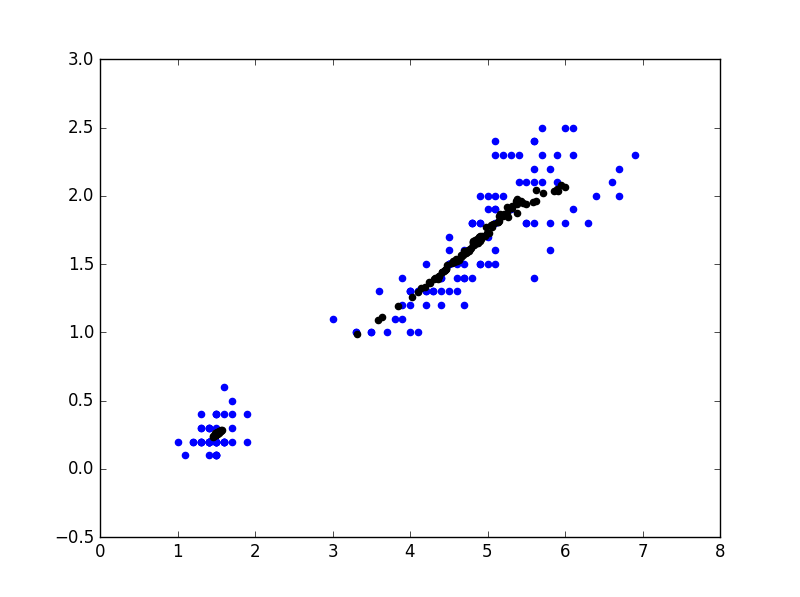

In [13]:
from IPython.display import Image
Image(filename = 'C://Users//Ratan Singh//Desktop//MeanShift_1.png',width = 800, height = 800)

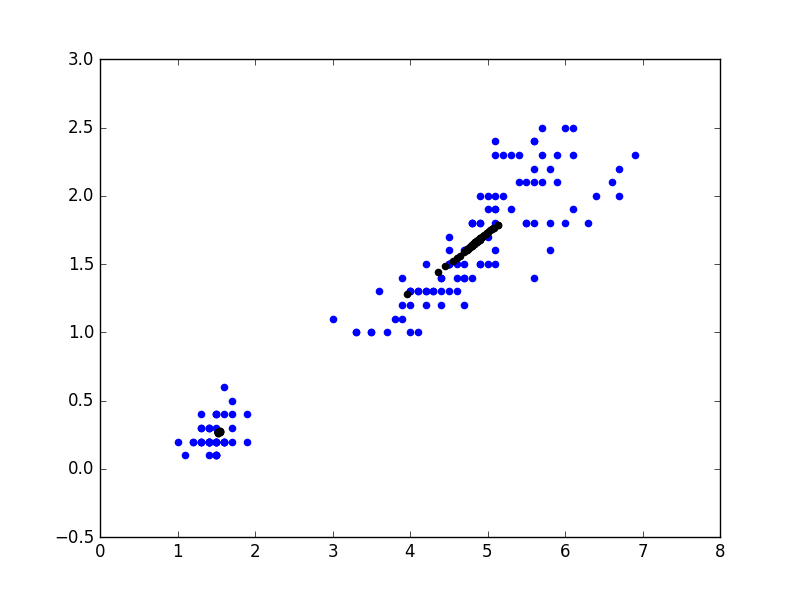

In [14]:
Image(filename = 'C://Users//Ratan Singh//Desktop//MeanShift_2.png',width = 800, height = 800)

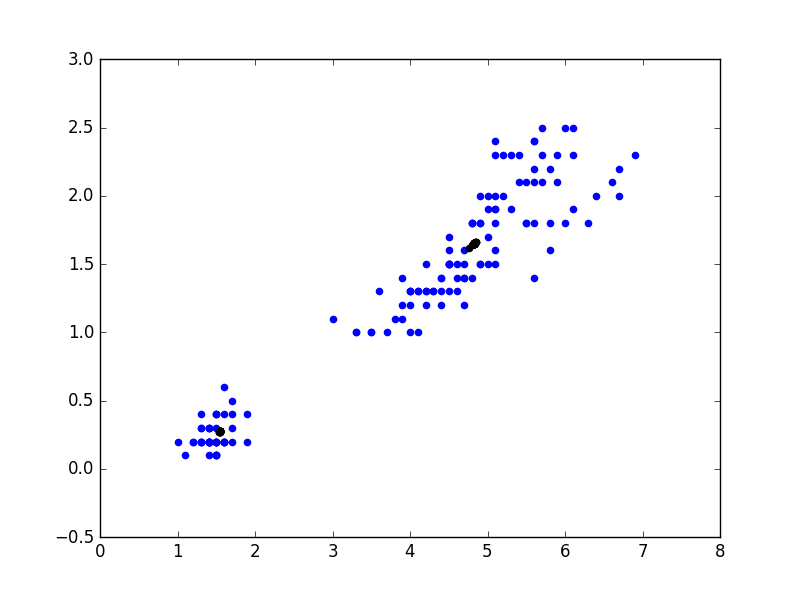

In [15]:
Image(filename = 'C://Users//Ratan Singh//Desktop//MeanShift_3.png',width = 800, height = 800)

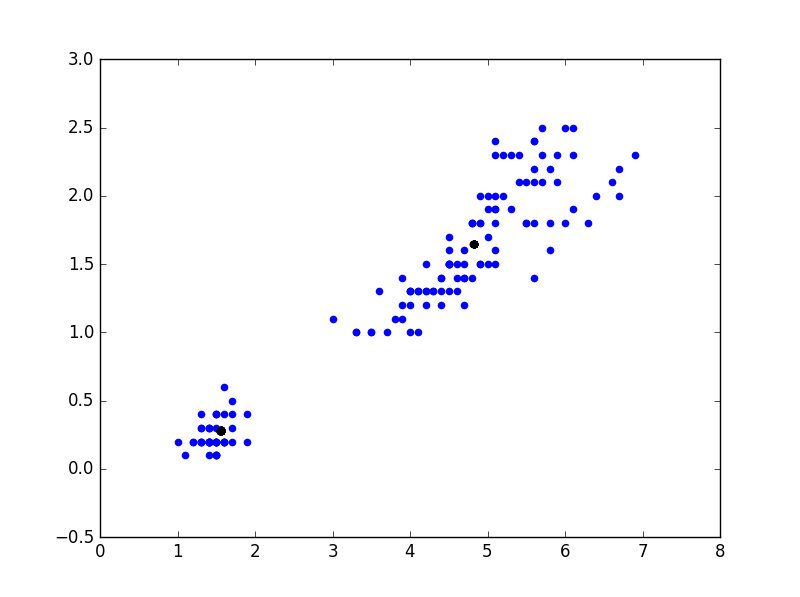

In [16]:
Image(filename = 'C://Users//Ratan Singh//Desktop//MeanShift_4.png',width = 800, height = 800)